In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
# Import the necessary modules
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

I0000 00:00:1746968022.099180    2102 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c


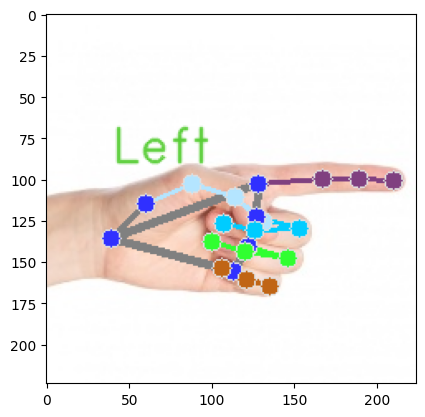

In [ ]:
# Create an HandLandmarker object
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# Load the input image
image = mp.Image.create_from_file("test.jpg")

# Detect hand landmarks from the input image
detection_result = detector.detect(image)

# Process the classification result. In this case, visualize it
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)

Выведем формат ответа mediapipe

In [ ]:
detection_result.hand_landmarks[0]

[NormalizedLandmark(x=0.4124771058559418, y=-0.048558950424194336, z=3.9273001561923593e-07, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.5260065197944641, y=0.02615813910961151, z=-0.0475468747317791, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.5719388723373413, y=0.13121040165424347, z=-0.0850774422287941, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.5694833993911743, y=0.23280423879623413, z=-0.1149497777223587, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.5622484683990479, y=0.3228062689304352, z=-0.14618681371212006, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4691210985183716, y=0.2236638218164444, z=-0.1107880100607872, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4495195150375366, y=0.3988340497016907, z=-0.16714929044246674, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4324134588241577, y=0.5032214522361755, z=-0.19511505961418152, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.41953277587890625, y